In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix

In [2]:
df=pd.read_csv("cuisine_data.csv")
df.drop("CustomerID",axis=1,inplace=True)
df

,Gender,Age,CityType,IncomeLevel,OrdersPerMonth,Vegetarian,SpicyPreference,CuisinePreference
0,Male,58,Urban,Medium,8,No,Medium,Chinese
1,Female,47,Urban,Medium,23,No,Low,Italian
2,Male,34,Urban,Low,9,Yes,High,Indian
3,Male,37,Rural,Low,2,Yes,Low,Indian
4,Male,42,Rural,Medium,14,Yes,Low,Chinese
...,...,...,...,...,...,...,...,...
795,Male,34,Urban,Medium,15,No,Medium,Italian
796,Male,54,Rural,Medium,10,No,Medium,Mexican
797,Male,42,Suburban,Medium,9,Yes,High,Chinese
798,Male,55,Suburban,High,1,Yes,High,Indian


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Gender,Age,CityType,IncomeLevel,OrdersPerMonth,Vegetarian,SpicyPreference,CuisinePreference
0,1,58,2,2,8,0,2,0
1,0,47,2,2,23,0,1,2
2,1,34,2,1,9,1,0,1
3,1,37,0,1,2,1,1,1
4,1,42,0,2,14,1,1,0
...,...,...,...,...,...,...,...,...
795,1,34,2,2,15,0,2,2
796,1,54,0,2,10,0,2,3
797,1,42,1,2,9,1,0,0
798,1,55,1,0,1,1,0,1


In [4]:
x=df.drop("CuisinePreference",axis=1)
y=df["CuisinePreference"]
y

0      0
1      2
2      1
3      1
4      0
      ..
795    2
796    3
797    0
798    1
799    2
Name: CuisinePreference, Length: 800, dtype: int64

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model=LogisticRegression(multi_class="multinomial")
model.fit(x_train,y_train)

c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [7]:
cross=cross_validate(model,x,y,cv=5,return_train_score=True)
cross

c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-

{'fit_time': array([0.03268075, 0.08348441, 0.15052009, 0.11940789, 0.12776732]),
 'score_time': array([0.01293993, 0.00245047, 0.        , 0.        , 0.00362301]),
 'test_score': array([0.36875, 0.525  , 0.39375, 0.4125 , 0.35625]),
 'train_score': array([0.4421875, 0.4      , 0.4484375, 0.4109375, 0.45     ])}

In [8]:
y_prob=model.predict_proba(x_test)
y_prob

array([[0.16651723, 0.19068384, 0.08172247, 0.56107646],
       [0.15739781, 0.43349476, 0.25153925, 0.15756818],
       [0.11595014, 0.57501469, 0.11876268, 0.19027249],
       [0.39232191, 0.07720182, 0.1173855 , 0.41309077],
       [0.41955308, 0.05973397, 0.22091422, 0.29979873],
       [0.36801534, 0.13761375, 0.40878524, 0.08558567],
       [0.25507084, 0.27970871, 0.19208395, 0.2731365 ],
       [0.21600953, 0.15008147, 0.22911805, 0.40479095],
       [0.41037817, 0.07679894, 0.3539272 , 0.15889569],
       [0.09376302, 0.46015526, 0.39543667, 0.05064505],
       [0.09823637, 0.43602516, 0.34180363, 0.12393484],
       [0.15288326, 0.40168921, 0.06707408, 0.37835345],
       [0.2037938 , 0.35343123, 0.14652578, 0.29624919],
       [0.1996637 , 0.30090837, 0.08211109, 0.41731684],
       [0.27384132, 0.11243938, 0.06877372, 0.54494557],
       [0.30876638, 0.06614764, 0.56939028, 0.0556957 ],
       [0.25534034, 0.14013276, 0.14929666, 0.45523024],
       [0.65024373, 0.03155871,

In [9]:
loss=log_loss(y_test,y_prob)
loss

1.300524940649358

In [10]:
y_pred=model.predict(x_test)
y_pred


array([3, 1, 1, 3, 0, 2, 1, 3, 0, 1, 1, 1, 1, 3, 3, 2, 3, 0, 0, 3, 2, 1,
       3, 3, 0, 1, 1, 2, 0, 2, 0, 3, 0, 0, 0, 0, 0, 1, 3, 1, 3, 3, 0, 2,
       3, 0, 3, 3, 3, 3, 1, 0, 3, 1, 3, 1, 0, 3, 3, 0, 3, 3, 1, 0, 1, 3,
       3, 0, 3, 2, 0, 0, 0, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 0, 3, 1, 0, 1,
       3, 3, 2, 0, 0, 3, 3, 1, 3, 0, 1, 0, 2, 0, 3, 2, 1, 3, 0, 1, 0, 1,
       0, 3, 3, 2, 3, 1, 0, 0, 3, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2,
       0, 1, 0, 0, 1, 3, 2, 2, 2, 3, 1, 2, 0, 2, 2, 0, 0, 0, 3, 1, 1, 0,
       3, 0, 1, 0, 3, 1])

In [11]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy:{accuracy*100:.2f}%")

accuracy:36.88%


In [15]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[20,  8, 10, 10],
       [ 7, 12,  5, 14],
       [16,  8,  7,  2],
       [12,  7,  2, 20]])

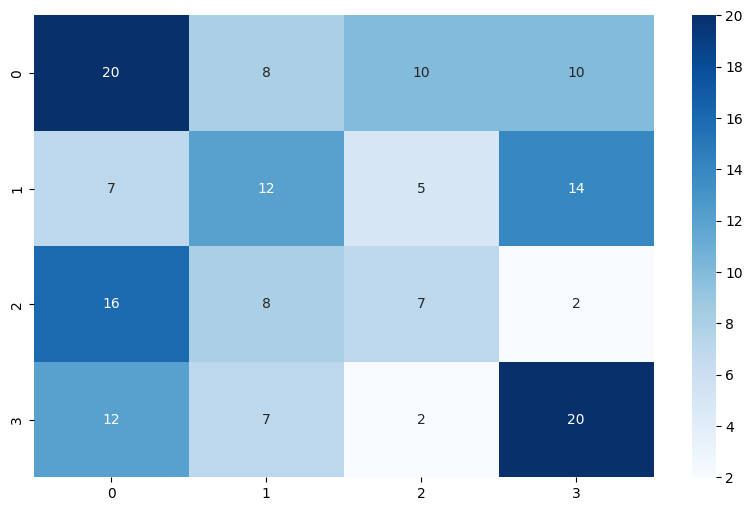

In [13]:
plt.figure(figsize=[10,6])
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.show()

In [14]:
data=pd.DataFrame({
    "Gender":label.fit_transform(["Male"]),
    "Age":[58],
    "CityType":label.fit_transform(["Urban"]),
    "IncomeLevel":label.fit_transform(["Medium"]),
    "OrdersPerMonth":[8],
    "Vegetarian":label.fit_transform(["No"]),
    "SpicyPreference":label.fit_transform(["Medium"])

})

pre=model.predict(data)
pre

array([1])